In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=nl---------nl-tso-0001exitfinal%20consumers,nl---------uk-tso-0004exittransmissionuk---------,nl---------nl-tso-0001exittransmission,nl---------nl-tso-0001exitstorage,nl---------nl-tso-0001exitdistribution,nl---------nl-tso-0001entryfinal%20consumers,nl---------nl-tso-0001entrytransmission%7Ctransmissionde-the-----,nl---------nl-tso-0001entrystorage,nl---------nl-tso-0001entrytransmissionde-the-----,nl---------nl-tso-0001entryproduction,nl---------nl-tso-0001entrylng%20terminals,nl---------nl-tso-0001exittransmissionbe-l-zone--,nl---------nl-tso-0001exitproduction,nl---------nl-tso-0001entrytransmissionbe-l-zone--,nl---------nl-tso-0001entrytransmissionbe-lux------,nl---------nl-tso-0001exittransmissionde-the-----,nl---------nl-tso-0001exittransmissionbe-lux------,nl---------nl-tso-0001entrytransmission,nl---------nl-tso-0001exitlng%20terminals,nl---------uk-tso-0004entrytransmissionuk---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesNLNL---------NL-TSO-0001entryLNG Te...        1   Aggregates   
1    1AggregatesNLNL---------NL-TSO-0001entryProduc...        1   Aggregates   
2    1AggregatesNLNL---------NL-TSO-0001entryStorag...        1   Aggregates   
3    1AggregatesNLNL---------NL-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesNLNL---------NL-TSO-0001entryTransm...        1   Aggregates   
..                                                 ...      ...          ...   
460  1AggregatesNLNL---------NL-TSO-0001exitTransmi...        1   Aggregates   
461  1AggregatesNLNL---------NL-TSO-0001exitTransmi...        1   Aggregates   
462  1AggregatesNLNL---------NL-TSO-0001exitTransmi...        1   Aggregates   
463  1AggregatesNLNL---------UK-TSO-0004entryTransm...        1   Aggregates   
464  1AggregatesNLNL---------UK-TSO-0004exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day        value
0          entry    2  371862777.8
1          entry    2  620892667.3
2          entry    2  640399287.7
3          entry    2  384202716.9
4          entry    2  227150485.7
..           ...  ...          ...
460         exit    1  332017046.5
461         exit    1   35966723.4
462         exit    1  585027173.5
463        entry    1  163804531.7
464         exit    1          0.0

[465 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         3.851523e+08
    exit          4.159487e+08
2   entry         3.412479e+08
    exit          3.108435e+08
3   entry         3.627647e+08
...                        ...
29  exit          2.584293e+08
30  entry         3.243606e+08
    exit          2.551346e+08
31  entry         3.666035e+08
    exit          3.293129e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

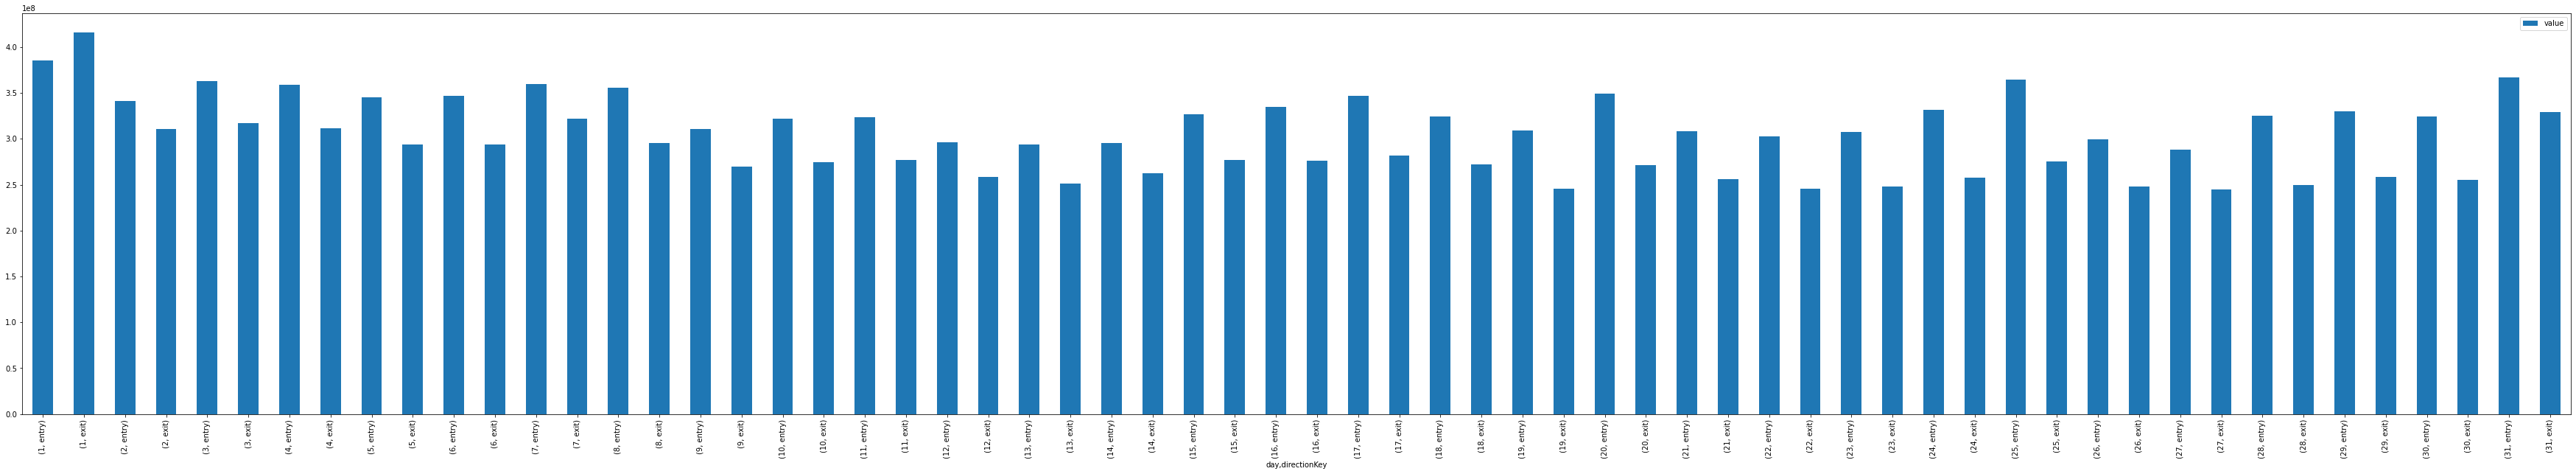

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))